# Module 1: Intro to Decision Analytics

### Week 1 DB: First Linear Programming

A healthcare clinic needs to determine FTE staffing requirements for the providers and can take fractional FTEs. The choices are between primary care physicians (MDs) who average 150K, nurse practitioners (NPs) who average 110K, and physician assistants PAs) who average 100K. 

1) At least 10 providers to meet demand. 
2) At least 1.5 NP for each PA.
3) Physicians can only supervise 2 non-physicians (NPs and PAs).

OBJ: min cost      150*MD + 110*NP + 100*PA

In [1]:
import pandas as pd
import numpy as np
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# Problem 1: Define Variables
MD = LpVariable("MD", 0, None) # Primary Care Physician
NP = LpVariable("NP", 0, None) # Nurse Practitioner
PA = LpVariable("PA", 0, None) # Physician Assistant

# Define the Problem 
prob = LpProblem("problem", LpMinimize)        

# Define the constraints
prob += 1*MD + 1*NP + 1*PA >= 10  # Need at least 10 providers to meet demand
prob += 1*NP - 1.5*PA      >= 0   # Need at least 1.5 NP for each PA      ;  make sure to not get the +/- mixed
prob += 2*MD - 1*PA - 1*NP >= 0   # Physicians can only supervise 2 non-physicians

# Define Objective function
prob += 150*MD + 110*NP + 100*PA


# Solve the Problem
status = prob.solve()
print(f"Problem 1")
print(f"status={LpStatus[status]}")

# print the results
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {value(prob.objective)}")
print(f"")

Problem 1
status=Optimal
MD = 3.33333
NP = 4.0
PA = 2.66667
Objective = 1206.6665



DB Week 1 part 2: Because the constraint matrix is square, this problem can be solved inverting the constraint matrix (if invertible) and multiplying by the right-hand side parameters.

In [2]:
import numpy as np

# constraint matrix
A = np.array([[1,1,1],
             [0,1,-1.5],
             [2,-1,-1]])

# right hand side
B = np.array([10,0,0])

# inverted constraint matrix
C = np.linalg.inv(A)

# matrix multiplication
mm = C * B
print(mm)

[[ 3.33333333  0.          0.        ]
 [ 4.          0.         -0.        ]
 [ 2.66666667 -0.         -0.        ]]


# Module 2: Linear Programming: Formulation & Solving

### HW ASSN 1: Decision Analysis and Formulation & Solving Linear Problems 

Convert exchange rates meeting certain criterian and constraints


| Convert  | 	USD	    | EUR	    | GBP	    | HKD	      | JPY         |
| -------- | ---------- | --------- | --------- | ----------- | ----------- |
| USD	   | 1	        | 1.01864	| 0.64090	| 7.79850	  | 118.55000   |
| EUR	   | 0.97240	| 1	        | 0.62950	| 7.65520	  | 116.41000   |
| GBP	   | 1.55930	| 1.58810	| 1	        | 12.15400	  | 184.97000   |
| HKD	   | 0.12812	| 0.13040	| 0.08210	| 1	          | 15.10050    |
| JPY	   | 0.00843	| 0.00856	| 0.00540	| 0.06580	  | 1           |

Five Questions (30 points each)

1. Create a model for this problem and solve it.

2. What is the optimal trading plan?

3. What is the optimal transaction cost (in equivalent USD)?

4. Suppose another executive thinks that holding 250,000 USD in each currency is excessive and wants to lower the amount to 50,000 USD in each currency. Does this help to lower the transaction cost? Why or why not?

5. Suppose the exchange rate for converting USD to GBP increased from 0.6409 to 0.6414. What happens to the optimal solution in this case?

In [3]:
import pandas as pd
import numpy as np

from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

In [4]:
# Create a model for this problem and solve it

# Variables
Xue = LpVariable("Xue", 0, None)  # USD to EUR
Xug = LpVariable("Xug", 0, None)  # USD to GBP
Xuh = LpVariable("Xuh", 0, None)  # USD to HKD
Xuj = LpVariable("Xuj", 0, None)  # USD to JPY
Xeu = LpVariable("Xeu", 0, None)  # EUR to USD
Xeg = LpVariable("Xeg", 0, None)  # EUR to GBP
Xeh = LpVariable("Xeh", 0, None)  # EUR to HKD
Xej = LpVariable("Xej", 0, None)  # EUR to JPY
Xge = LpVariable("Xge", 0, None)  # GBP to EUR
Xgh = LpVariable("Xgh", 0, None)  # GBP to HKD
Xgj = LpVariable("Xgj", 0, None)  # GBP to JPY
Xgu = LpVariable("Xgu", 0, None)  # GBP to USD
Xhg = LpVariable("Xhg", 0, None)  # HKD to GBP
Xhe = LpVariable("Xhe", 0, None)  # HKD to EUR
Xhj = LpVariable("Xhj", 0, None)  # HKD to JPY
Xhu = LpVariable("Xhu", 0, None)  # HKD to USD
Xju = LpVariable("Xju", 0, None)  # JPY to USD
Xjg = LpVariable("Xjg", 0, None)  # JPY to GBP
Xjh = LpVariable("Xjh", 0, None)  # JPY to HKD
Xje = LpVariable("Xje", 0, None)  # JPY to EUR


# Define the Problem 
prob = LpProblem("problem", LpMinimize)          # Note, LpMax for max prob, LpMin for min prob

# Define the constraints 
prob += (0.9724*Xeu + 1.5593*Xgu + 0.12812*Xhu + 0.00843*Xju) - (1*Xue + 1*Xug + 1*Xuh + 1*Xuj) + 2000000 >= 250000  # USD
prob += (1.01864*Xue + 1.5581*Xge + 0.1304*Xhe + 0.00856*Xje) - (1*Xeu + 1*Xeg + 1*Xeh + 1*Xej) + 5000000 >= 8000000  # EUR
prob += (0.6409*Xug + 0.6295*Xeg + 0.0821*Xhg + 0.0054*Xjg) - (1*Xgu + 1*Xge + 1*Xgh + 1*Xgj) + 1000000 >= 160225  # GBP
prob += (7.7985*Xuh + 7.6552*Xeh + 12.154*Xgh + 0.0658*Xjh) - (1*Xhu + 1*Xhe + 1*Xhg + 1*Xhj) + 3000000 >= 1949625  # HKD
prob += (118.55*Xuj + 116.41*Xej + 184.97*Xgj + 15.1005*Xhj) - (1*Xju + 1*Xje + 1*Xjg + 1*Xjh) + 30000000 >= 54000000  # JPY


# Define Objective function ;  minimize transaction costs
prob += 0.009213*Xue+0.0001005*Xug+0.00011*Xuh+0.000005256105*Xuj+0.009474464*Xeu+0.000453834*Xeg+       \
    0.000225737*Xeh+0.00000297613*Xej+0.000283017*Xge+0.000276304*Xgh+0.000000979566*Xgj+0.00064463*Xgu+ \
    0.003362786*Xhg+0.001713291*Xhe+0.00000538433*Xhj+0.00085618*Xhu+0.0006235*Xju+0.001811907*Xjg+      \
    0.000818315*Xjh+0.003432961*Xje

# Solve the Problem
status = prob.solve()
print(f"Optimal Trading Plan")
print(f"status={LpStatus[status]}")

# print the results
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {value(prob.objective)}")
print(f"")

Optimal Trading Plan
status=Optimal
Xeg = 0.0
Xeh = 0.0
Xej = 0.0
Xeu = 0.0
Xge = 1515420.0
Xgh = 0.0
Xgj = 0.0
Xgu = 0.0
Xhe = 0.0
Xhg = 0.0
Xhj = 1050370.0
Xhu = 0.0
Xje = 0.0
Xjg = 0.0
Xjh = 0.0
Xju = 0.0
Xue = 627141.0
Xug = 1054210.0
Xuh = 0.0
Xuj = 68653.0
Objective = 6318.704146218666



In [5]:
# Executive decides to lower minimum to $50,000 USD in each currency

# Variables
Xue = LpVariable("Xue", 0, None)  # USD to EUR
Xug = LpVariable("Xug", 0, None)  # USD to GBP
Xuh = LpVariable("Xuh", 0, None)  # USD to HKD
Xuj = LpVariable("Xuj", 0, None)  # USD to JPY
Xeu = LpVariable("Xeu", 0, None)  # EUR to USD
Xeg = LpVariable("Xeg", 0, None)  # EUR to GBP
Xeh = LpVariable("Xeh", 0, None)  # EUR to HKD
Xej = LpVariable("Xej", 0, None)  # EUR to JPY
Xge = LpVariable("Xge", 0, None)  # GBP to EUR
Xgh = LpVariable("Xgh", 0, None)  # GBP to HKD
Xgj = LpVariable("Xgj", 0, None)  # GBP to JPY
Xgu = LpVariable("Xgu", 0, None)  # GBP to USD
Xhg = LpVariable("Xhg", 0, None)  # HKD to GBP
Xhe = LpVariable("Xhe", 0, None)  # HKD to EUR
Xhj = LpVariable("Xhj", 0, None)  # HKD to JPY
Xhu = LpVariable("Xhu", 0, None)  # HKD to USD
Xju = LpVariable("Xju", 0, None)  # JPY to USD
Xjg = LpVariable("Xjg", 0, None)  # JPY to GBP
Xjh = LpVariable("Xjh", 0, None)  # JPY to HKD
Xje = LpVariable("Xje", 0, None)  # JPY to EUR


# Define the Problem 
prob = LpProblem("problem", LpMinimize)          # Note, LpMax for max prob, LpMin for min prob

# Define the constraints
prob += (0.9724*Xeu + 1.5593*Xgu + 0.12812*Xhu + 0.00843*Xju) - (1*Xue + 1*Xug + 1*Xuh + 1*Xuj) + 2000000 >= 50000  # USD
prob += (1.01864*Xue + 1.5581*Xge + 0.1304*Xhe + 0.00856*Xje) - (1*Xeu + 1*Xeg + 1*Xeh + 1*Xej) + 5000000 >= 8000000  # EUR
prob += (0.6409*Xug + 0.6295*Xeg + 0.0821*Xhg + 0.0054*Xjg) - (1*Xgu + 1*Xge + 1*Xgh + 1*Xgj) + 1000000 >= 32045  # GBP
prob += (7.7985*Xuh + 7.6552*Xeh + 12.154*Xgh + 0.0658*Xjh) - (1*Xhu + 1*Xhe + 1*Xhg + 1*Xhj) + 3000000 >= 389925  # HKD
prob += (118.55*Xuj + 116.41*Xej + 184.97*Xgj + 15.1005*Xhj) - (1*Xju + 1*Xje + 1*Xjg + 1*Xjh) + 30000000 >= 54000000  # JPY


# Define Objective function ;  minimize transaction costs
prob += 0.009213*Xue+0.0001005*Xug+0.00011*Xuh+0.000005256105*Xuj+0.009474464*Xeu+0.000453834*Xeg+       \
    0.000225737*Xeh+0.00000297613*Xej+0.000283017*Xge+0.000276304*Xgh+0.000000979566*Xgj+0.00064463*Xgu+ \
    0.003362786*Xhg+0.001713291*Xhe+0.00000538433*Xhj+0.00085618*Xhu+0.0006235*Xju+0.001811907*Xjg+      \
    0.000818315*Xjh+0.003432961*Xje

# Solve the Problem
status = prob.solve()
print(f"Lower limits to 50k USD in each currency")
print(f"status={LpStatus[status]}")

# print the results
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {value(prob.objective)}")
print(f"")

Lower limits to 50k USD in each currency
status=Optimal
Xeg = 0.0
Xeh = 0.0
Xej = 0.0
Xeu = 0.0
Xge = 1925420.0
Xgh = 0.0
Xgj = 0.0
Xgu = 0.0
Xhe = 0.0
Xhg = 0.0
Xhj = 0.0
Xhu = 0.0
Xje = 0.0
Xjg = 0.0
Xjh = 0.0
Xju = 0.0
Xue = 0.0
Xug = 1493940.0
Xuh = 0.0
Xuj = 202446.0
Objective = 696.1316395728301



In [6]:
# Suppose the exchange rate for converting USD to GBP increased from 0.6409 to 0.6414
# Variables
Xue = LpVariable("Xue", 0, None)  # USD to EUR
Xug = LpVariable("Xug", 0, None)  # USD to GBP
Xuh = LpVariable("Xuh", 0, None)  # USD to HKD
Xuj = LpVariable("Xuj", 0, None)  # USD to JPY
Xeu = LpVariable("Xeu", 0, None)  # EUR to USD
Xeg = LpVariable("Xeg", 0, None)  # EUR to GBP
Xeh = LpVariable("Xeh", 0, None)  # EUR to HKD
Xej = LpVariable("Xej", 0, None)  # EUR to JPY
Xge = LpVariable("Xge", 0, None)  # GBP to EUR
Xgh = LpVariable("Xgh", 0, None)  # GBP to HKD
Xgj = LpVariable("Xgj", 0, None)  # GBP to JPY
Xgu = LpVariable("Xgu", 0, None)  # GBP to USD
Xhg = LpVariable("Xhg", 0, None)  # HKD to GBP
Xhe = LpVariable("Xhe", 0, None)  # HKD to EUR
Xhj = LpVariable("Xhj", 0, None)  # HKD to JPY
Xhu = LpVariable("Xhu", 0, None)  # HKD to USD
Xju = LpVariable("Xju", 0, None)  # JPY to USD
Xjg = LpVariable("Xjg", 0, None)  # JPY to GBP
Xjh = LpVariable("Xjh", 0, None)  # JPY to HKD
Xje = LpVariable("Xje", 0, None)  # JPY to EUR


# Define the Problem 
prob = LpProblem("problem", LpMinimize)          # Note, LpMax for max prob, LpMin for min prob

# Define the constraints
prob += (0.9724*Xeu + 1.5593*Xgu + 0.12812*Xhu + 0.00843*Xju) - (1*Xue + 1*Xug + 1*Xuh + 1*Xuj) + 2000000 >= 250000  # USD
prob += (1.01864*Xue + 1.5581*Xge + 0.1304*Xhe + 0.00856*Xje) - (1*Xeu + 1*Xeg + 1*Xeh + 1*Xej) + 5000000 >= 8000000  # EUR
prob += (0.6414*Xug + 0.6295*Xeg + 0.0821*Xhg + 0.0054*Xjg) - (1*Xgu + 1*Xge + 1*Xgh + 1*Xgj) + 1000000 >= 160225  # GBP
prob += (7.7985*Xuh + 7.6552*Xeh + 12.154*Xgh + 0.0658*Xjh) - (1*Xhu + 1*Xhe + 1*Xhg + 1*Xhj) + 3000000 >= 1949625  # HKD
prob += (118.55*Xuj + 116.41*Xej + 184.97*Xgj + 15.1005*Xhj) - (1*Xju + 1*Xje + 1*Xjg + 1*Xjh) + 30000000 >= 54000000  # JPY


# Define Objective function ;  minimize transaction costs
prob += 0.009213*Xue+0.0001005*Xug+0.00011*Xuh+0.000005256105*Xuj+0.009474464*Xeu+0.000453834*Xeg+       \
    0.000225737*Xeh+0.00000297613*Xej+0.000283017*Xge+0.000276304*Xgh+0.000000979566*Xgj+0.00064463*Xgu+ \
    0.003362786*Xhg+0.001713291*Xhe+0.00000538433*Xhj+0.00085618*Xhu+0.0006235*Xju+0.001811907*Xjg+      \
    0.000818315*Xjh+0.003432961*Xje

# Solve the Problem
status = prob.solve()
print(f"Increasing exchange rate for converting USD to GBP from 0.6409 to 0.6414")
print(f"status={LpStatus[status]}")

# print the results
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {value(prob.objective)}")
print(f"")

Increasing exchange rate for converting USD to GBP from 0.6409 to 0.6414
status=Optimal
Xeg = 0.0
Xeh = 0.0
Xej = 0.0
Xeu = 0.0
Xge = 1545030.0
Xgh = 0.0
Xgj = 44000.7
Xgu = 0.0
Xhe = 0.0
Xhg = 0.0
Xhj = 1050380.0
Xhu = 0.0
Xje = 0.0
Xjg = 0.0
Xjh = 0.0
Xju = 0.0
Xue = 581839.0
Xug = 1168160.0
Xuh = 0.0
Xuj = 0.0
Objective = 5920.851236645098



### Week 2 DB: Another LP

- Obj: Min cost ; either make or order

|                | 	Model 1   | Model 2   | Model 3   |
| --------       | ---------- | --------- | --------- |
| Ordered        | 3000       | 2000	  | 900       | 
| Wiring Hrs     | 2          | 1.5       | 3         | 
| Harnessing Hrs | 1          | 2         | 1         |
| Cost to Make   | 50    	  | 83	      | 130	      | 
| Cost to Buy    | 61         | 97        | 145  	  |


This analysis is for a leading maker of slip-rings. A $750,000 order has just been received and must be filled.  Constraints in filling the order are based on hours for wiring each unit and hours for harnessing each unit. 

The company has 10,000 hours of wiring capacity and 5,000 hours of harnessing capacity. It must either make or buy the various models to meet the demand.

In [7]:
import pandas as pd
import numpy as np
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# Problem 1: Define Variables
M1m = LpVariable("M1m", 0, None) # making model 1 orders
M1b = LpVariable("M1b", 0, None) # buying model 1 orders
M2m = LpVariable("M2m", 0, None) # making model 2 orders
M2b = LpVariable("M2b", 0, None) # buying model 2 orders
M3m = LpVariable("M3m", 0, None) # making model 3 orders
M3b = LpVariable("M3b", 0, None) # buying model 3 orders

# Define the Problem 
prob = LpProblem("problem", LpMinimize)        

# Define the constraints
prob += 2*M1m + 1.5*M2m + 3*M3m <= 10000    # wiring hours
prob += 1*M1m + 2*M2m + 1*M3m   <= 5000     # harnessing hours
prob += 1*M1m + 1*M1b           >= 3000     # Model 1 orders
prob += 1*M2m + 1*M2b           >= 2000     # Model 2 orders
prob += 1*M3m + 1*M3b           >= 900      # Model 3 orders

# Define Objective function
prob += 50*M1m + 61*M1b + 83*M2m + 97*M2b + 130*M3m + 145*M3b

# Solve the Problem
status = prob.solve()
print(f"Problem 1")
print(f"status={LpStatus[status]}")

# print the results
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {value(prob.objective)}")
print(f"")

Problem 1
status=Optimal
M1b = 0.0
M1m = 3000.0
M2b = 1450.0
M2m = 550.0
M3b = 0.0
M3m = 900.0
Objective = 453300.0



# Module 3: Linear Programming: Dual and Sensitivity Analysis

### Week 3 DB: Sensitivity Analysis

Give an example of a problem where sensitivity analysis would be particularly useful

Sensitivity analysis helps reveal insights on how optimal solutions can change as constraints and coefficients are adjusted. As an example, let’s say a deli vendor is running a promotion on a sliced ham product, as well as a sliced cheese product. We expect to sell through all that we bring in, the main issue is the constraints at the fulfillment center. We could set up the problem to maximize sales of ham at 4.50 and cheese at 2.50. Constraints would include storage space, vendor funding, and fulfillment center slicing capacity. A unit of ham could take up 0.1 cubic feet, and a unit of cheese 0.05 cubic feet. The total capacity allotted for this promotion is 3,500 cubic feet. The ham and cheese are delivered as hunks to the fulfillment center but sliced into 10 units/hunk by machines and repackaged before delivery to the customer. Let’s say the labor hour to sliced unit ratio for ham is 0.001 hours and for cheese is 0.002 hours. The maximum labor allotted for slicing in the week is 60 hours. Finally, the vendor is willing to fund the promotion at 2 per unit of ham sold, and 2 per unit of cheese sold, but with a maximum budget of 100K.

The sensitivity analysis can be extremely helpful to know the impact of adjusting price of the product, and the impact if constraints can be adjusted. The optimal solution stays the same as the price of cheese fluctuates from 2.25 to 4.50 (while maintaining the same price for ham), and ham this holds true from 2.50 to 5.00. Additionally, if we're able to find a way to increase the maximum weekly labor hours for slicing from 60 to 70, the new optimal solution yields revenue of 165K instead of 145K.

In [8]:
import pandas as pd
import numpy as np
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize, GLPK

# Problem 1: Define Variables
ham = LpVariable("ham", 0, None) # making model 1 orders
cheese = LpVariable("cheese", 0, None) # buying model 1 orders

# Define the Problem 
prob = LpProblem("problem", LpMaximize)        

# Define the constraints
prob += .1*ham + .05*cheese <= 3500    # wiring hours
prob += 2*ham + 2*cheese   <= 100000     # harnessing hours
prob += 0.002*ham + 0.001*cheese   <= 60     # harnessing hours

# Define Objective function
prob += 4.5*ham + 2.5*cheese

# Solve the Problem
prob.writeLP("prob.lp")
prob.solve(GLPK(options=['--ranges prob.sen']))
print("status:", LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Objective", value(prob.objective))
print("")

status: Optimal
cheese = 40000.0
ham = 10000.0
Objective 145000.0



### Module 4: Network Models

### HW 2: Brewery Transshipment Problem

Transship Problem throughout 4 Breweries, 3 Packaging Facilities and 15 demand locations

In [10]:
import pandas as pd
import numpy as np
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize, GLPK, makeDict, lpSum

### Set up problem
# Create variable names B1/P1/R1...
breweries = []    # supply nodes
packaging = []    # intermediate nodes
retail = []       # demand nodes

for i in range(4):
    breweries.append("B" + str(i+1))
for i in range(3):
    packaging.append("P" + str(i+1))
for i in range(15):
    retail.append("R" + str(i+1))

# Transportation Costs    
supply_min_brew = {"B1":100, "B2":150, "B3":200, "B4":100}       # Brewery capacity minimum units
supply_max_brew = {"B1":2000, "B2":2500, "B3":3500, "B4":2000}   # Brewery capacity maximum units

supply_min_pack = {"P1":50, "P2":100, "P3":150}                  # Packaging facility minimum units
supply_max_pack = {"P1":500, "P2":1500, "P3":2500}               # Packaging facility maximum units
 
# Retail Store Demand
demand = {
    "R1":48,
    "R2":84,
    "R3":64,
    "R4":106,
    "R5":47,
    "R6":57,
    "R7":64,
    "R8":93,
    "R9":74,
    "R10":41,
    "R11":61,
    "R12":42,
    "R13":57,
    "R14":70,
    "R15":41
}


# List of costs for each transportation path

costs_brew_to_pack = [
    [1.55, 0.51, 0.9],   # Brewery 1
    [0.81, 3.18, 0.65],  # Brewery 2
    [2.13, 0.97, 0.51],  # Brewery 3
    [1.23, 2.15, 2.08]   # Brewery 4
]


costs_pack_to_retail = [
    [4.82, 2.05, 4.42, 3.83, 0.97, 3.04, 3.91, 4.03, 5.11, 0.90, 4.39, 0.85, 2.81, 3.94, 1.04 ], # Packaging facility 1
    [1.83, 4.03, 3.95, 4.21, 4.78, 3.20, 1.88, 2.96, 5.11, 2.67, 4.14, 1.22, 5.10, 3.47, 1.92 ], # Packaging facility 2
    [2.66, 0.95, 3.94, 2.04, 2.35, 1.42, 3.60, 3.17, 1.34, 4.51, 0.74, 0.94, 1.98, 4.77, 2.04 ]  # Packaging facility 3
]


# Create a dictionary transportation costs
costs_brew_to_pack = makeDict([breweries, packaging], costs_brew_to_pack, 0)   # costs from brewery to packaging facilities
costs_pack_to_retail = makeDict([packaging, retail], costs_pack_to_retail, 0)  # costs from packaging to retail stores

# Create the problem
prob = LpProblem("Brewery Transshipment Problem", LpMinimize)


### Define Decision Variables

# Create list of tuples for all possible routes from breweries to packaging facilities
Routes_b_p = [(b,p) for b in breweries for p in packaging]

# Create dictionary to contain referenced variables for the routes from breweries to packaging facilities
vars = LpVariable.dicts("Route", (breweries, packaging), 0, None)

# Create list of tuples for all posible routes from packaging facilities to retail stores
Routes_p_r = [(p,r) for p in packaging for r in retail]

# Create dictionary to contain referenced variables for the routes from packaging to retail stores
vars_2 = LpVariable.dicts("Route", (packaging, retail), 0, None)


# Add objective function to 'prob'
prob += (
    lpSum([vars[b][p] * costs_brew_to_pack[b][p] for (b,p) in Routes_b_p]) + lpSum([vars_2[p][r] * costs_pack_to_retail[p][r] for (p,r) in Routes_p_r]),
    "Sum_of_Transporting_costs",
)


C:\Users\richd\anaconda3\lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [11]:
### Constraints

# Brewery minimum and maximum capacity 
for b in breweries:
    prob += (
        lpSum([vars[b][p] for p in packaging]) >= supply_min_brew[b],
        "Sum_of_min_Products_out_of_breweries_%s" % b
    )
for b in breweries:
    prob += (
        lpSum([vars[b][p] for p in packaging]) <= supply_max_brew[b],
        "Sum_of_max_Products_out_of_breweries_%s" % b
    )

# Packaging minimum and maximum capacity
for p in packaging:
    prob += (
        lpSum([vars_2[p][r] for r in retail]) >= supply_min_pack[p],
        "Sum_of_min_Products_out_of_breweries_%s" % p
    )
for p in packaging:
    prob += (
        lpSum([vars_2[p][r] for r in retail]) <= supply_max_pack[p],
        "Sum_of_max_Products_out_of_breweries_%s" % p
    )

# Retail Store Demand
for r in retail:
    prob += (
        lpSum([vars_2[p][r] for p in packaging]) >= demand[r],
        "Sum_of_min_Products_out_of_breweries_%s" % r
    )

    
# What's shipped in must be shipped out
for p in packaging:
    prob += (
        lpSum([vars[b][p] for b in breweries]) - lpSum([vars_2[p][r] for r in retail]) == 0,
        "Sum_of_products_out_of_packaging_%s" % p
    )


In [12]:
# Solve the Problem
prob.solve()
prob.writeLP("prob_assn2.lp")
prob.solve(GLPK(options=['--ranges prob_assn2.sen']))
print("status:", LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Objective", value(prob.objective))
print("")

status: Optimal
Route_B1_P1 = 0.0
Route_B1_P2 = 275.0
Route_B1_P3 = 0.0
Route_B2_P1 = 29.0
Route_B2_P2 = 0.0
Route_B2_P3 = 121.0
Route_B3_P1 = 0.0
Route_B3_P2 = 0.0
Route_B3_P3 = 424.0
Route_B4_P1 = 100.0
Route_B4_P2 = 0.0
Route_B4_P3 = 0.0
Route_P1_R1 = 0.0
Route_P1_R10 = 41.0
Route_P1_R11 = 0.0
Route_P1_R12 = 0.0
Route_P1_R13 = 0.0
Route_P1_R14 = 0.0
Route_P1_R15 = 41.0
Route_P1_R2 = 0.0
Route_P1_R3 = 0.0
Route_P1_R4 = 0.0
Route_P1_R5 = 47.0
Route_P1_R6 = 0.0
Route_P1_R7 = 0.0
Route_P1_R8 = 0.0
Route_P1_R9 = 0.0
Route_P2_R1 = 48.0
Route_P2_R10 = 0.0
Route_P2_R11 = 0.0
Route_P2_R12 = 0.0
Route_P2_R13 = 0.0
Route_P2_R14 = 70.0
Route_P2_R15 = 0.0
Route_P2_R2 = 0.0
Route_P2_R3 = 0.0
Route_P2_R4 = 0.0
Route_P2_R5 = 0.0
Route_P2_R6 = 0.0
Route_P2_R7 = 64.0
Route_P2_R8 = 93.0
Route_P2_R9 = 0.0
Route_P3_R1 = 0.0
Route_P3_R10 = 0.0
Route_P3_R11 = 61.0
Route_P3_R12 = 42.0
Route_P3_R13 = 57.0
Route_P3_R14 = 0.0
Route_P3_R15 = 0.0
Route_P3_R2 = 84.0
Route_P3_R3 = 64.0
Route_P3_R4 = 106.0
Route_P

In [13]:
### This section is where I answered problems 2-4. I made adjustments to test removing breweries and package facilities, as well as demand multiples

### Set up problem
# Create variable names B1/P1/R1...
breweries = []    # supply nodes
packaging = []    # intermediate nodes
retail = []       # demand nodes

for i in range(3):
    breweries.append("B" + str(i+1))
for i in range(3):
    packaging.append("P" + str(i+1))
for i in range(15):
    retail.append("R" + str(i+1))

# Transportation Costs    

# supply_min_brew = {"B1":100, "B2":150, "B3":200, "B4":100}       # Brewery capacity minimum units
# supply_max_brew = {"B1":2000, "B2":2500, "B3":3500, "B4":2000}   # Brewery capacity maximum units

supply_min_brew = {"B1":100, "B2":150, "B3":200}       # Brewery capacity minimum units
supply_max_brew = {"B1":2000, "B2":2500, "B3":3500}   # Brewery capacity maximum units

# supply_min_pack = {"P1":50, "P2":100}                  # Packaging facility minimum units
# supply_max_pack = {"P1":500, "P2":1500}               # Packaging facility maximum units

supply_min_pack = {"P1":50, "P2":100, "P3":150}                  # Packaging facility minimum units
supply_max_pack = {"P1":500, "P2":1500, "P3":2500}               # Packaging facility maximum units
 
# Retail Store Demand
demand = {
    "R1":48,
    "R2":84,
    "R3":64,
    "R4":106,
    "R5":47,
    "R6":57,
    "R7":64,
    "R8":93,
    "R9":74,
    "R10":41,
    "R11":61,
    "R12":42,
    "R13":57,
    "R14":70,
    "R15":41
}

demand_multiple = demand
for key in demand_multiple:
    demand_multiple[key] *= 4.7

# List of costs for each transportation path

costs_brew_to_pack = [
    [1.55, 0.51, 0.9],   # Brewery 1
    [0.81, 3.18, 0.65],  # Brewery 2
    [2.13, 0.97, 0.51]# ,  # Brewery 3
#    [1.23, 2.15, 2.08]   # Brewery 4
]


costs_pack_to_retail = [
    [4.82, 2.05, 4.42, 3.83, 0.97, 3.04, 3.91, 4.03, 5.11, 0.90, 4.39, 0.85, 2.81, 3.94, 1.04 ], # Packaging facility 1
    [1.83, 4.03, 3.95, 4.21, 4.78, 3.20, 1.88, 2.96, 5.11, 2.67, 4.14, 1.22, 5.10, 3.47, 1.92 ], # Packaging facility 2
    [2.66, 0.95, 3.94, 2.04, 2.35, 1.42, 3.60, 3.17, 1.34, 4.51, 0.74, 0.94, 1.98, 4.77, 2.04 ]  # Packaging facility 3
]


# Create a dictionary transportation costs
costs_brew_to_pack = makeDict([breweries, packaging], costs_brew_to_pack, 0)   # costs from brewery to packaging facilities
costs_pack_to_retail = makeDict([packaging, retail], costs_pack_to_retail, 0)  # costs from packaging to retail stores

# Create the problem
prob = LpProblem("Brewery Transshipment Problem", LpMinimize)


### Define Decision Variables

# Create list of tuples for all possible routes from breweries to packaging facilities
Routes_b_p = [(b,p) for b in breweries for p in packaging]

# Create dictionary to contain referenced variables for the routes from breweries to packaging facilities
vars = LpVariable.dicts("Route", (breweries, packaging), 0, None)

# Create list of tuples for all posible routes from packaging facilities to retail stores
Routes_p_r = [(p,r) for p in packaging for r in retail]

# Create dictionary to contain referenced variables for the routes from packaging to retail stores
vars_2 = LpVariable.dicts("Route", (packaging, retail), 0, None)


# Add objective function to 'prob'
prob += (
    lpSum([vars[b][p] * costs_brew_to_pack[b][p] for (b,p) in Routes_b_p]) + lpSum([vars_2[p][r] * costs_pack_to_retail[p][r] for (p,r) in Routes_p_r]),
    "Sum_of_Transporting_costs",
)


### Constraints

# Brewery minimum and maximum capacity 
for b in breweries:
    prob += (
        lpSum([vars[b][p] for p in packaging]) >= supply_min_brew[b],
        "Sum_of_min_Products_out_of_breweries_%s" % b
    )
for b in breweries:
    prob += (
        lpSum([vars[b][p] for p in packaging]) <= supply_max_brew[b],
        "Sum_of_max_Products_out_of_breweries_%s" % b
    )

# Packaging minimum and maximum capacity
for p in packaging:
    prob += (
        lpSum([vars_2[p][r] for r in retail]) >= supply_min_pack[p],
        "Sum_of_min_Products_out_of_breweries_%s" % p
    )
for p in packaging:
    prob += (
        lpSum([vars_2[p][r] for r in retail]) <= supply_max_pack[p],
        "Sum_of_max_Products_out_of_breweries_%s" % p
    )

# Retail Store Demand
for r in retail:
    prob += (
        lpSum([vars_2[p][r] for p in packaging]) >= demand_multiple[r],
        "Sum_of_min_Products_out_of_breweries_%s" % r
    )

    
# What's shipped in must be shipped out
for p in packaging:
    prob += (
        lpSum([vars[b][p] for b in breweries]) - lpSum([vars_2[p][r] for r in retail]) == 0,
        "Sum_of_products_out_of_packaging_%s" % p
    )

#Solve problem
prob.solve()

# print the variables optimized value
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# optimized objective function value
print("Value of Objective Function = ", value(prob.objective))



Route_B1_P1 = 0.0
Route_B1_P2 = 1460.3
Route_B1_P3 = 0.0
Route_B2_P1 = 500.0
Route_B2_P2 = 0.0
Route_B2_P3 = 0.0
Route_B3_P1 = 0.0
Route_B3_P2 = 0.0
Route_B3_P3 = 2500.0
Route_P1_R1 = 0.0
Route_P1_R10 = 192.7
Route_P1_R11 = 0.0
Route_P1_R12 = 0.0
Route_P1_R13 = 0.0
Route_P1_R14 = 0.0
Route_P1_R15 = 86.4
Route_P1_R2 = 0.0
Route_P1_R3 = 0.0
Route_P1_R4 = 0.0
Route_P1_R5 = 220.9
Route_P1_R6 = 0.0
Route_P1_R7 = 0.0
Route_P1_R8 = 0.0
Route_P1_R9 = 0.0
Route_P2_R1 = 225.6
Route_P2_R10 = 0.0
Route_P2_R11 = 0.0
Route_P2_R12 = 0.0
Route_P2_R13 = 0.0
Route_P2_R14 = 329.0
Route_P2_R15 = 106.3
Route_P2_R2 = 0.0
Route_P2_R3 = 61.5
Route_P2_R4 = 0.0
Route_P2_R5 = 0.0
Route_P2_R6 = 0.0
Route_P2_R7 = 300.8
Route_P2_R8 = 437.1
Route_P2_R9 = 0.0
Route_P3_R1 = 0.0
Route_P3_R10 = 0.0
Route_P3_R11 = 286.7
Route_P3_R12 = 197.4
Route_P3_R13 = 267.9
Route_P3_R14 = 0.0
Route_P3_R15 = 0.0
Route_P3_R2 = 394.8
Route_P3_R3 = 239.3
Route_P3_R4 = 498.2
Route_P3_R5 = 0.0
Route_P3_R6 = 267.9
Route_P3_R7 = 0.0
Route_P3

### Week 4 DB: Transshipment Problem

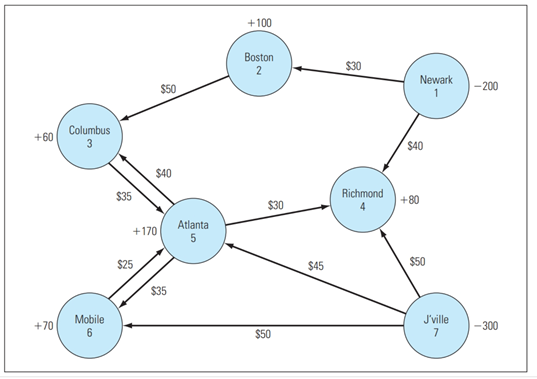

The Bavarian Motor Company (BMC) manufactures expensive luxury cars in Hamburg, Germany, and exports cars to sell in the United States. The exported cars are shipped from Hamburg to ports in Newark, New Jersey and Jacksonville, Florida. From these ports, the cars are transported by rail or truck to distributors located in Boston, Massachusetts; Columbus, Ohio; Atlanta, Georgia; Richmond, Virginia; and Mobile, Alabama. The below figure shows the possible shipping routes available to the company along with the transportation cost for shipping each car along the indicated path. Currently, 200 cars are available at the port in Newark and 300 are available in Jacksonville. The numbers of cars needed by the distributors in Boston, Columbus, Atlanta, Richmond, and Mobile are 100, 60, 170, 80, and 70, respectively. BMC wants to determine the least costly way of transporting cars from the ports in Newark and Jacksonville to the cities where they are needed.  Formulate the LP and solve it using software of your choice. Conduct sensitivity analysis by varying the cost of shipping across selected links. Interpret the results.

In [16]:
import pandas as pd
import numpy as np
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize, GLPK, makeDict, lpSum

ports = ["N", "J"]
supply = {
    "N":200,
    "J":300
}

cities = ["R", "A", "M", "C", "A"]

# Define Variables
NB = LpVariable("NB", 0, None)
NR = LpVariable("NR", 0, None)
JR = LpVariable("JR", 0, None)
JA = LpVariable("JA", 0, None)
JM = LpVariable("JM", 0, None)
BC = LpVariable("BC", 0, None)
CA = LpVariable("CA", 0, None)
AC = LpVariable("AC", 0, None)
MA = LpVariable("MA", 0, None)
AM = LpVariable("AM", 0, None)
AR = LpVariable("AR", 0, None)

ND = LpVariable("ND", 0, None)
JD = LpVariable("JD", 0, None)


# Define the Problem
prob = LpProblem("Problem", LpMinimize)

# Define the Constraints
prob += -1*NB - 1*NR  >=  -200              # Supply from Newark
prob += -1*JR - 1*JA - 1*JM  >=  -300       # Supply from Jacksonville

prob += 1*NB - 1*BC >= 100                                     # Demand into Boston
prob += 1*BC + 1*AC - 1*CA >= 60                               # Demand into Columbus
prob += 1*CA + 1*MA + 1*JA - 1*AC - 1*AM - 1*AR >= 170         # Demand into Atlanta
prob += 1*NR + 1*AR + 1*JR >= 80                               # Demand into Richmond
prob += 1*AM + 1*JM - 1*MA >= 70                               # Demand into Mobile
prob += 1*ND + 1*JD >= 20                                      # Extra demand to dummy demand node

# Define the Objective Function
prob += 30*NB+50*BC+35*CA+40*AC+30*AR+25*MA+35*AM+40*NR+50*JM+45*JA+50*JR

# Solve the Problem
prob.writeLP("prob.lp")
prob.solve(GLPK(options=['--ranges prob.sen']))
print("status:", LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Objective", value(prob.objective))
print("")

status: Optimal
AC = 40.0
AM = 0.0
AR = 0.0
BC = 20.0
CA = 0.0
JA = 210.0
JD = 20.0
JM = 70.0
JR = 0.0
MA = 0.0
NB = 120.0
ND = 0.0
NR = 80.0
Objective 22350.0



# Module 5: Integer Programming

### Week 5 DB: Knapsack Problems

|    Item        | Value      | Volume (Cb ft)|
| --------       | ---------- | ------------- | 
| Bedroom set    | 60         | 800     	  | 
| Dining Rm set  | 48         | 600           | 
| Gaming Comp.   | 14         | 300           | 
| Sofa           | 31   	  | 400 	      |
| TV             | 10         | 200           | 

You are moving from New Jersey to California and have rented a truck that can haul up to 1,100 cubic feet of furniture.  The volume and value of each item you are considering moving on the truck is given below. 

Which items should you take to California using the knapsack problem formulation? 
However, what unrealistic assumptions are you making about this real-life problem by using the knapsack problem? 

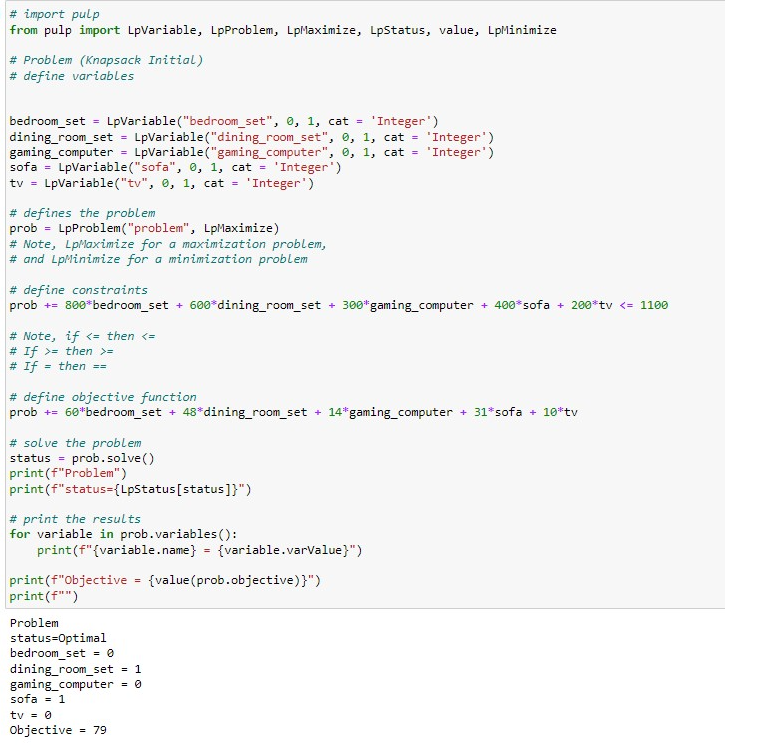

### Some racecar problem, but similar set up

In [21]:
# import pulp
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# Problem (Knapsack Initial)
# define variables
x1 = LpVariable("x1", 0, 1, cat = 'Integer')
x2 = LpVariable("x2", 0, 1, cat = 'Integer')
x3 = LpVariable("x3", 0, 1, cat = 'Integer')
x4 = LpVariable("x4", 0, 1, cat = 'Integer')

# defines the problem
prob = LpProblem("problem", LpMaximize)
# Note, LpMaximize for a maximization problem, 
# and LpMinimize for a minimization problem

# define constraints
prob += 4*x1 + 5*x2 + 7*x3 + 3*x4 <= 14

# Note, if <= then <=
# If >= then >=
# If = then ==

# define objective function
prob += 12*x1 + 16*x2 + 22*x3 + 8*x4

# solve the problem
status = prob.solve()
print(f"Problem")
print(f"status={LpStatus[status]}")

# print the results
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {value(prob.objective)}")
print(f"")



Problem
status=Optimal
x1 = 1
x2 = 0
x3 = 1
x4 = 1
Objective = 42



In [22]:
# Problem (Racecar)
# define variables
x1 = LpVariable("x1", 0, 1, cat = 'Integer')
x2 = LpVariable("x2", 0, 1, cat = 'Integer')
x3 = LpVariable("x3", 0, 1, cat = 'Integer')
x4 = LpVariable("x4", 0, 1, cat = 'Integer')
x5 = LpVariable("x5", 0, 1, cat = 'Integer')
x6 = LpVariable("x6", 0, 1, cat = 'Integer')

# defines the problem
prob = LpProblem("problem", LpMaximize)
# Note, LpMaximize for a maximization problem, 
# and LpMinimize for a minimization problem

# define constraints
prob += 10200*x1 + 6000*x2 + 23800*x3 + 11100*x4 + 9800*x5 + 31600*x6 <= 35000

# Note, if <= then <=
# If >= then >=
# If = then ==

# define objective function
prob += 8*x1 + 3*x2 + 15*x3 + 7*x4 + 10*x5 + 12*x6

# solve the problem
status = prob.solve()
print(f"Problem")
print(f"status={LpStatus[status]}")

# print the results
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {value(prob.objective)}")
print(f"")

Problem
status=Optimal
x1 = 1
x2 = 0
x3 = 0
x4 = 1
x5 = 1
x6 = 0
Objective = 25

